In [2]:
import os, sys
sys.path.append(os.getcwd()+"/..")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
os.getcwd()

'/home/dahahn/projects/K_ENSEMBLER/Ensembler/examples'

In [3]:
import ensembler.potentials.OneD as pot
import ensembler.system.perturbed_system as system
import ensembler.ensemble.replicas_dynamic_parameters as cvb
from ensembler.integrator import stochastic


SYSTEM ASSIGNS random POSITION FOR: states: 1	nDim: 1


# Interactive Example 

In [4]:
from ensembler.visualisation.interactive_plots import interactive_conveyor_belt

iwidget = interactive_conveyor_belt(nbins=10, numsys=3, steps=10)

SYSTEM ASSIGNS random POSITION FOR: states: 1	nDim: 1


AppLayout(children=(VBox(children=(Play(value=0, description='rotate', max=360), HBox(children=(IntSlider(valu…

# BUILD Conveyor Belt

In [5]:
numsys = 8
steps = 10

integrat = stochastic.metropolisMonteCarloIntegrator()
potial = pot.linearCoupledPotentials()
syst = system.perturbedSystem(potential=potial , integrator=integrat)

SYSTEM ASSIGNS random POSITION FOR: states: 1	nDim: 1


In [6]:
ens=cvb.ConveyorBelt(0.0, numsys, system=syst, build=False)
ens


{0: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f0347fe6190>, 1: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f03541101d0>, 2: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f03540a61d0>, 3: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f035407d290>, 4: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f0354096bd0>, 5: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f0347fc13d0>, 6: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f0347fa9c90>, 7: <ensembler.system.perturbed_system.perturbedSystem object at 0x7f0354096510>}


0.0      0.00    41.148
1.0      0.00    42.387
2.0      0.00    42.671
3.0      0.00    41.845
4.0      0.00    43.098
5.0      0.00    41.363
6.0      0.00    44.717
7.0      0.00    43.101

In [7]:
#ens.traj_clear()
ens.simulate(steps)

print(ens.reject)


2


In [8]:
(cvb_traj, systrajs) = ens.get_trajs()

In [9]:
systrajs[0].head()

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity,lam,dhdlam
0,-9.040048201323906,NaN,41.147500,40.861236,0.286264,NaN,0.756656,0.000000,-9.040048
1,-8.78526,NaN,38.590409,38.590409,NaN,0.254787,NaN,0.000000,-9.040048
2,-8.14096,NaN,48.230489,48.230489,NaN,0.644306,NaN,0.045546,-12.786615
3,-7.69358,NaN,87.877391,87.877391,NaN,0.447373,NaN,0.196927,-24.172708
4,-7.23117,NaN,119.474066,119.474066,NaN,0.462411,NaN,0.356969,-35.157253


In [10]:
# old: traj=pd.DataFrame(traj, columns=['Step', 'CapLam', 'Energy', 'Bias'])
cvb_traj.head()

,Step,capital_lambda,TotE,biasE,doAccept
0,1,0.143088,1740.056131,1740.056131,True
1,2,0.618665,1491.818707,1491.818707,True
2,3,1.121450,1314.472147,1314.472147,True
3,4,1.851864,1055.310367,1055.310367,True
4,5,1.439607,946.264387,946.264387,True


# Plot Simulation

In [11]:
nbins=100
bins=np.zeros(nbins)
dhdlbins=np.zeros(nbins)
for i in systrajs:
    for j in range(systrajs[i].shape[0]):
        index=int(np.floor(systrajs[i].lam[j]*nbins))
        if index == nbins:
            index=nbins-1
        bins[index]+=1
        dhdlbins[index]+=systrajs[i].dhdlam[j]
for i, b in enumerate(bins):
    if b > 0:
        dhdlbins[i]/=b

Integral =  -17.245677221595784


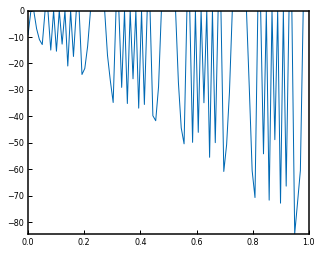

In [12]:
plt.plot(np.linspace(0,1,nbins), dhdlbins)
integral=np.sum(dhdlbins)*1.0/nbins
print('Integral = ', integral)

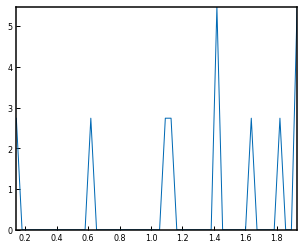

In [13]:
h1=np.histogram(cvb_traj.capital_lambda, bins=50, density=1)
plt.plot(h1[1][:-1], h1[0])
#plt.ylim(0.14, 0.185)

Text(0, 0.5, '$\\lambda$')

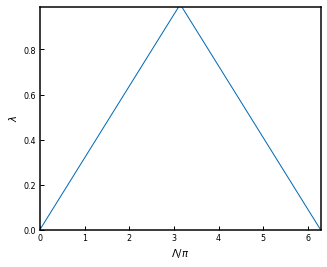

In [14]:
caplam = np.linspace(0, 2*np.pi, 100)
x=[]
for i in caplam:
    x.append(ens.calc_lam(i, 0))
plt.plot(caplam, x)
plt.xlabel('$\Lambda / \pi$')
plt.ylabel('$\lambda$')

In [15]:
#analytical
u=1.66053886e-27
NA=6.0221415e23
hbar=1.054571800e-34*1e12*1e-3*NA  #kJ/mol*ps
R=0.00831446 #kJ/mol/K
mu=0.5  #u
T=300.0  #K
fc1=1  #kJ/nm^2/mol
fc2=11.0 #kJ/nm^2/mol
omega1=np.sqrt(fc1/mu)
omega2=np.sqrt(fc2/mu)
print('Omega', omega1, omega2)
alpha1=hbar*np.sqrt(fc1/mu)/(R*T)
alpha2=hbar*np.sqrt(fc2/mu)/(R*T)
print(alpha1, alpha2)
Z1=np.exp(-alpha1/2.0)/(1-np.exp(-alpha1))
Z2=np.exp(-alpha2/2.0)/(1-np.exp(-alpha2))
F1=-R*T*np.log(Z1)
F2=-R*T*np.log(Z2)
DF=F2-F1
DF2=-R*T*np.log(Z2/Z1)
print(DF, DF2, F1, F2)

Omega 1.4142135623730951 4.69041575982343
0.03600698886161772 0.11942167188449208
2.991927940369414 2.991927940369415 -8.291150088634001 -5.299222148264588


# Conveyor Belt Animation

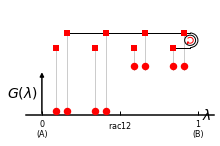

In [20]:
import ensembler.visualisation.plotConveyorBelt as plotEnsembler
nbins=2
dhdlbins=np.ones(2)
lam = np.linspace(0, 1, nbins)
ene = np.cumsum(dhdlbins)/nbins

fig = plotEnsembler.drawFunicular(lam, ene, CapLam=0.5, M=8)